started
Index(['Time', 'Algorithm', 'latency', 'cpuUsage', 'eventArrivalRate',
       'TransitionStatus', 'QueryEndToEndLatencyPrediction',
       'QueryThroughputPrediction'],
      dtype='object')


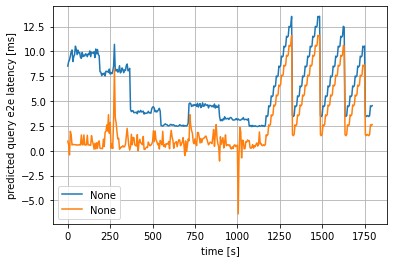

AttributeError: 'Figure' object has no attribute 'get_yaxis'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

print("started")

filepath = os.path.join("/home/niels/Desktop")
interval = 5
log_file = [y for x in os.walk(filepath) for y in glob(os.path.join(x[0], 'TransitionConfig*.csv'))][0]

#ax = df["latency"].plot()
#filename = '/home/niels/Downloads/data_collection/mininet_accident/sampling_1s/mininet_accident_1s_combined_samples.csv'
#logfile = 'yahoo_geni_1s_logs.csv'
#filename = "stats-Conjunction11bf7aeaea-87321827.csv"
#f = open(filename)
#df = pd.read_csv(f, sep=";", header=0)
#f.close()
with open(log_file) as l:
    log_df = pd.read_csv(l, sep=",", header=0)
    print(log_df.columns)
    log_df.columns = log_df.columns.str.strip()  # fix messy whitespace in column names
    log_df.set_index("Time", inplace=True)

    run_length = int(30 * (60 / interval))
    runs = []
    run_count = 1
    new_index = pd.Index(list(range(0, 1800, interval)))
    for i in range(0, run_length * run_count, run_length):
        runs.append(log_df[i:i + run_length])
        runs[-1].set_index(new_index, inplace=True)

    #ax = runs[0]["latency"].plot( grid=True, xlabel='time [s]', ylabel="query e2e latency [ms]")
    targets = ["latency", "eventArrivalRate"]
    prediction_targets = ["QueryEndToEndLatencyPrediction", "QueryThroughputPrediction"]
    ylabels = ["query e2e latency [ms]", "events / interval"]
    for t in [0, 1]:
        data_at_timesteps = pd.DataFrame()
        prediction_at_timesteps = pd.DataFrame()
        for timestep in range(0, int(30 * 60), interval):
            #print(runs[0].loc[[timestep]])
            #print(runs[1].loc[[timestep]])
            data_at_timesteps[timestep] = [runs[i].loc[[timestep]][targets[t]] for i in range(0, run_count)]
            prediction_at_timesteps[timestep] = [runs[i].loc[[timestep]][prediction_targets[t]] for i in range(0, run_count)]

        data = data_at_timesteps
        x = data.columns
        mean = data.mean()
        ax = mean.plot(grid=True, xlabel='time [s]', ylabel=ylabels[t], legend=targets[t])
        std = data.std()
        low = mean - 2 * std
        high = mean + 2 * std
        palette = sns.color_palette()
        ax.fill_between(x, low, high, alpha=0.2, color=palette.pop(0))

        # prediction
        data = prediction_at_timesteps
        x = data.columns
        mean = data.mean()
        ax = mean.plot(grid=True, xlabel='time [s]', ylabel='predicted ' + ylabels[t], ax=ax, legend='predicted %s' % targets[t])
        std = data.std()
        low = mean - 2 * std
        high = mean + 2 * std
        palette = sns.color_palette()
        ax.fill_between(x, low, high, alpha=0.2, color=palette.pop(0))
        plt.show()

        plt.clf()
        algorithms = ["MDCEP", "ProducerConsumer", "Random", "GlobalOptimalBDP", "Relaxation", "Rizou", ]
        ax = plt.figure()

        lat_groups = group_latency_data()
        ax.plot(lat_data.Time, [req for _ in range(lat_data.shape[0])], label = "Requirement", color=colordict["Requirement"], linewidth=3)
        for g in lat_groups:
            if flags[ops.index(g["Algorithm"][0])]:
                sns.lineplot(g["Time"], g["Latency"], color=colordict[g["Algorithm"][0]], label=g["Algorithm"][0], ax=axes[0], linewidth=2, alpha=0.8)
                flags[ops.index(g["Algorithm"][0])] = False
            else:
                sns.lineplot(g["Time"], g["Latency"], color=colordict[g["Algorithm"][0]], ax=axes[0], linewidth=2, alpha=0.8)

        for a in algorithms:
            cur_al = log_df[ log_df.Algorithm == a ]
            cur_al.plot(grid=True, xlabel='time [s]', ylabel=ylabels[t], ax=ax)

        plt.show()


def group_latency_data(d):
    data = []
    current_op = d["Algorithm"][0]
    last = 0
    for i in range(0,len(d["Time"])):
        new = d["Algorithm"][i]
        if new != current_op:
            tmp = {"Time": d["Time"][last:i], "Algorithm": d["Algorithm"][last:i], "Latency": d["Latency"][last:i]}
            last = i
            current_op = new
            data.append(tmp)
    tmp = {"Time": d["Time"][last:], "Algorithm": d["Algorithm"][last:], "Latency": d["Latency"][last:]}
    data.append(tmp)
    return data
'''
    plt.clf()
    plt.plot(log_df["eventArrivalRate"], label="event arrivals at consumer")
    plt.grid()
    plt.xlabel('time [s]')
    plt.ylabel('arrived events / interval')
    plt.show()


df = df._get_numeric_data()
#print(df)
numeric_headers = list(df.columns.values)
#print(numeric_headers)
#df = df[ np.abs(df['e2eLatencyMean'] - df['e2eLatencyMean'].mean(axis=0)) <= 2 * df['e2eLatencyMean'].std(axis=0) ]
#df['processingLatencyMean'] = df['processingLatencyMean'] * 1000
plt.clf()
plt.plot(df["processingLatencyMean"], label="processingLatencyMean", color="limegreen")
plt.grid()
plt.legend()
plt.ylabel("processingLatencyMean")
plt.xlabel("sample")
plt.show()

plt.clf()
plt.plot(df["eventRateOut"], label="eventRateOut", color="red")
plt.grid()
plt.legend()
plt.ylabel("eventRateOut")
plt.xlabel("sample")
plt.show()

df.to_csv('/tmp/samples_with_comma.csv', sep=',', index=None)
'''